<img src="./ORS_img/ors_logo.jpg" width="350"/>

# Analyse de données de la pandémie (evolution) COVID-19.

**By Hani Bounoua, Souhil Zaida**

Nous allons durant cet ateliers explorer des données ajoure sur la pandémie du **COVID-19** .....

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess

# Set Maximum columns (of data frame) displayed as None.
from IPython.display import display
pd.options.display.max_columns = None

In [322]:
print("start")
subprocess.call("./dataIn/ccr.sh", shell=True)
print("end")

start
end


In [323]:
# https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

covid19_confirmed = pd.read_csv('./dataIn/time_series_19-covid-Confirmed.csv')
covid19_recovered = pd.read_csv('./dataIn/time_series_19-covid-Recovered.csv')
covid19_deaths = pd.read_csv('./dataIn/time_series_19-covid-Deaths.csv')

## Inspéction des tableaux de données:

1. Dimension des données.
2. Nom des colonnes.
3. Données manquantes.
4. Affichage des types des colonne.
5. Affichage des données.

### Dimension des dataframe:

In [324]:
print('Confirmed cases of COVID-19 dataframe\'s shape:\t{}'.format(covid19_confirmed.shape))
print('Deaths cases of COVID-19 dataframe\'s shape:\t{}'.format(covid19_deaths.shape))
print('Recovered cases of COVID-19 dataframe\'s shape:\t{}'.format(covid19_recovered.shape))

Confirmed cases of COVID-19 dataframe's shape:	(477, 63)
Deaths cases of COVID-19 dataframe's shape:	(477, 63)
Recovered cases of COVID-19 dataframe's shape:	(477, 63)


### Nom des colonnes:

In [325]:
print('Confirmed cases of COVID-19 dataframe\'s columns name:\n\n{}\n'.format(covid19_confirmed.columns))
print('Deaths cases of COVID-19 dataframe\'s columns name:\n\n{}\n'.format(covid19_deaths.columns))
print('Recovered cases of COVID-19 dataframe\'s columns name:\n\n{}\n'.format(covid19_recovered.columns))

Confirmed cases of COVID-19 dataframe's columns name:

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20'],
      dtype='object')

Deaths cases of COVID-19 dataframe's columns name:

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20

On doit redimentionner notre dataframe en ajoutant une colonne date cela aura pour effet de reduire le nombre de colonne et de rajouter des ligne ce qui vas rendre le dataframe plus lisible

In [326]:
covid19_confirmed_melted = covid19_confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                                                 var_name= 'Date',
                                                 value_name= 'Confirmed')
covid19_deaths_melted = covid19_deaths.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                                                 var_name= 'Date',
                                                 value_name= 'Deaths')
covid19_recovered_melted = covid19_recovered.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                                                 var_name= 'Date',
                                                 value_name= 'Recovered')

### Données manquantes:

In [327]:
print('Confirmed cases of COVID-19 number of dataframe\'s missing data by columns:\n\n{}\n'.format(covid19_confirmed_melted.isnull().sum()))
print('Deaths cases of COVID-19 number of dataframe\'s missing data columns:\n\n{}\n'.format(covid19_deaths_melted.isnull().sum()))
print('Recovered cases of COVID-19 number of dataframe\'s missing data columns:\n\n{}\n'.format(covid19_recovered_melted.isnull().sum()))

Confirmed cases of COVID-19 number of dataframe's missing data by columns:

Province/State    9027
Country/Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
dtype: int64

Deaths cases of COVID-19 number of dataframe's missing data columns:

Province/State    9027
Country/Region       0
Lat                  0
Long                 0
Date                 0
Deaths               0
dtype: int64

Recovered cases of COVID-19 number of dataframe's missing data columns:

Province/State    9027
Country/Region       0
Lat                  0
Long                 0
Date                 0
Recovered            0
dtype: int64



In [328]:
covid19_confirmed_melted['Province/State'].fillna(covid19_confirmed_melted['Country/Region'], inplace=True)
covid19_deaths_melted['Province/State'].fillna(covid19_deaths_melted['Country/Region'], inplace=True)
covid19_recovered_melted['Province/State'].fillna(covid19_recovered_melted['Country/Region'], inplace=True)

In [329]:
print('Confirmed cases of COVID-19 number of dataframe\'s missing data by columns:\n\n{}\n'.format(covid19_confirmed_melted.isnull().sum()))
print('Deaths cases of COVID-19 number of dataframe\'s missing data columns:\n\n{}\n'.format(covid19_deaths_melted.isnull().sum()))
print('Recovered cases of COVID-19 number of dataframe\'s missing data columns:\n\n{}\n'.format(covid19_recovered_melted.isnull().sum()))

Confirmed cases of COVID-19 number of dataframe's missing data by columns:

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
dtype: int64

Deaths cases of COVID-19 number of dataframe's missing data columns:

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Deaths            0
dtype: int64

Recovered cases of COVID-19 number of dataframe's missing data columns:

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Recovered         0
dtype: int64



### Affichage des types des colonnes:

In [330]:
print('Confirmed cases of COVID-19 data types of each columns:\n\n{}\n'.format(covid19_confirmed_melted.dtypes))
print('Deaths cases of COVID-19 data types of each columns:\n\n{}\n'.format(covid19_deaths_melted.dtypes))
print('Recovered cases of COVID-19 number of data types of each columns:\n\n{}\n'.format(covid19_recovered_melted.dtypes))

Confirmed cases of COVID-19 data types of each columns:

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
dtype: object

Deaths cases of COVID-19 data types of each columns:

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Deaths              int64
dtype: object

Recovered cases of COVID-19 number of data types of each columns:

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Recovered           int64
dtype: object



La colonne **Date** est en format **character** en doit caster en format **Datetime**

In [331]:
covid19_confirmed_melted['Date'] = pd.to_datetime(covid19_confirmed_melted['Date'])
covid19_deaths_melted['Date'] = pd.to_datetime(covid19_deaths_melted['Date'])
covid19_recovered_melted['Date']= pd.to_datetime(covid19_recovered_melted['Date'])

In [332]:
print('Confirmed cases of COVID-19 data types of each columns:\n\n{}\n'.format(covid19_confirmed_melted.dtypes))
print('Deaths cases of COVID-19 data types of each columns:\n\n{}\n'.format(covid19_deaths_melted.dtypes))
print('Recovered cases of COVID-19 number of data types of each columns:\n\n{}\n'.format(covid19_recovered_melted.dtypes))

Confirmed cases of COVID-19 data types of each columns:

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
dtype: object

Deaths cases of COVID-19 data types of each columns:

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Deaths                     int64
dtype: object

Recovered cases of COVID-19 number of data types of each columns:

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Recovered                  int64
dtype: object



### Afficher les données:

In [333]:
print('Confirmed COVID-19 Cases:\n\n{}\n'.format(covid19_confirmed_melted.head()))
print('Deaths COVID-19 Cases:\n\n{}\n'.format(covid19_deaths_melted.head()))
print('Recovered COVID-19 Cases:\n\n{}\n'.format(covid19_recovered_melted.head()))

Confirmed COVID-19 Cases:

  Province/State Country/Region      Lat      Long       Date  Confirmed
0       Thailand       Thailand  15.0000  101.0000 2020-01-22          2
1          Japan          Japan  36.0000  138.0000 2020-01-22          2
2      Singapore      Singapore   1.2833  103.8333 2020-01-22          0
3          Nepal          Nepal  28.1667   84.2500 2020-01-22          0
4       Malaysia       Malaysia   2.5000  112.5000 2020-01-22          0

Deaths COVID-19 Cases:

  Province/State Country/Region      Lat      Long       Date  Deaths
0       Thailand       Thailand  15.0000  101.0000 2020-01-22       0
1          Japan          Japan  36.0000  138.0000 2020-01-22       0
2      Singapore      Singapore   1.2833  103.8333 2020-01-22       0
3          Nepal          Nepal  28.1667   84.2500 2020-01-22       0
4       Malaysia       Malaysia   2.5000  112.5000 2020-01-22       0

Recovered COVID-19 Cases:

  Province/State Country/Region      Lat      Long       Date 

In [334]:
print('Confirmed cases of COVID-19 dataframe\'s shape:\t{}'.format(covid19_confirmed_melted.shape))
print('Deaths cases of COVID-19 dataframe\'s shape:\t{}'.format(covid19_deaths_melted.shape))
print('Recovered cases of COVID-19 dataframe\'s shape:\t{}'.format(covid19_recovered_melted.shape))

Confirmed cases of COVID-19 dataframe's shape:	(28143, 6)
Deaths cases of COVID-19 dataframe's shape:	(28143, 6)
Recovered cases of COVID-19 dataframe's shape:	(28143, 6)


### Combiner les trois tableau:

In [335]:
covid19_data = pd.merge(covid19_confirmed_melted, covid19_deaths_melted,
                        on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])
covid19_data = pd.merge(covid19_data, covid19_recovered_melted,
                        on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])

## Création de Variables:

In [336]:
covid19_data['Actual_Confirmed'] = covid19_data.Confirmed - covid19_data.Deaths - covid19_data.Recovered
covid19_data['ADR'] = 100*covid19_data.Deaths/covid19_data.Confirmed #Absolute Death rate
covid19_data['DRR'] = 100*covid19_data.Deaths/(covid19_data.Deaths + covid19_data.Recovered) #Death/Recovred Rate.

In [337]:
covid19_data.fillna(0, inplace=True) #Nan Generated by dividing by zero
covid19_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Actual_Confirmed,ADR,DRR
0,Thailand,Thailand,15.0000,101.0000,2020-01-22,2,0,0,2,0.0,0.0
1,Japan,Japan,36.0000,138.0000,2020-01-22,2,0,0,2,0.0,0.0
2,Singapore,Singapore,1.2833,103.8333,2020-01-22,0,0,0,0,0.0,0.0
3,Nepal,Nepal,28.1667,84.2500,2020-01-22,0,0,0,0,0.0,0.0
4,Malaysia,Malaysia,2.5000,112.5000,2020-01-22,0,0,0,0,0.0,0.0


In [338]:
Country_data = pd.read_csv('./dataIn/region.csv') # Liste des pays par continent/sous continents.
# https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes
Country_data.drop(labels=['alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'],
                   axis=1,
                   inplace=True)

# renomer la colonne qui nous servira de joiture entre les deux dataframes.
country_data_columns = list(Country_data.columns)
country_data_columns[0] = 'Country/Region'
Dict = dict()
country_columns = list(Country_data.columns)
for ind, col in enumerate(country_columns):
    Dict[col] = country_data_columns[ind]

Country_data.rename(columns = Dict, inplace =True)

# Joindre les deux dataframes:

Covid19 = covid19_data.merge(Country_data, on=['Country/Region'], how='left')

In [339]:
print(Covid19.loc[Covid19.region.isnull(), 'Country/Region'].unique())
print(Country_data.loc[180:200, 'Country/Region'])

['Brunei' 'US' 'Iran' 'Korea, South' 'Cruise Ship' 'Taiwan*' 'Vietnam'
 'Russia' 'Moldova' 'Bolivia' 'United Kingdom' 'Congo (Kinshasa)'
 "Cote d'Ivoire" 'Venezuela' 'Kosovo' 'Congo (Brazzaville)' 'Tanzania'
 'Gambia, The' 'Bahamas, The']
180                                           Qatar
181                                         Réunion
182                                         Romania
183                              Russian Federation
184                                          Rwanda
185                                Saint Barthélemy
186    Saint Helena, Ascension and Tristan da Cunha
187                           Saint Kitts and Nevis
188                                     Saint Lucia
189                      Saint Martin (French part)
190                       Saint Pierre and Miquelon
191                Saint Vincent and the Grenadines
192                                           Samoa
193                                      San Marino
194                           Sao

In [340]:
# Changement de la nomenclature des Etat vers une nomenclature officielle

Covid19.loc[Covid19['Country/Region'] == 'Brunei', 'Country/Region'] = 'Brunei Darussalam'
Covid19.loc[Covid19['Country/Region'] == 'Congo (Kinshasa)', 'Country/Region'] = 'Congo, Democratic Republic of the'
Covid19.loc[Covid19['Country/Region'] == 'Curacao', 'Country/Region'] = 'Curaçao'
Covid19.loc[Covid19['Country/Region'] == "Cote d'Ivoire", 'Country/Region'] = "Côte d'Ivoire"
Covid19.loc[Covid19['Country/Region'] == 'Bolivia', 'Country/Region'] = 'Bolivia (Plurinational State of)'
Covid19.loc[Covid19['Country/Region'] == 'Korea, South', 'Country/Region'] = 'Korea, Republic of'
Covid19.loc[Covid19['Country/Region'] == 'Iran', 'Country/Region'] = 'Iran (Islamic Republic of)'
Covid19.loc[Covid19['Country/Region'] == 'Moldova', 'Country/Region'] = 'Moldova, Republic of'
Covid19.loc[Covid19['Country/Region'] == 'occupied Palestinian territory', 'Country/Region'] = 'Palestine, State of'
Covid19.loc[Covid19['Country/Region'] == 'Reunion', 'Country/Region'] = 'Réunion'
Covid19.loc[Covid19['Country/Region'] == 'Taiwan*', 'Country/Region'] = 'Taiwan, Province of China'
Covid19.loc[Covid19['Country/Region'] == 'United Kingdom', 'Country/Region'] = 'United Kingdom of Great Britain and Northern Ireland'
Covid19.loc[Covid19['Country/Region'] == 'US', 'Country/Region'] = 'United States of America'
Covid19.loc[Covid19['Country/Region'] == 'Russia', 'Country/Region'] = 'Russian Federation'
Covid19.loc[Covid19['Country/Region'] == 'Venezuela', 'Country/Region'] = 'Venezuela (Bolivarian Republic of)'
Covid19.loc[Covid19['Country/Region'] == 'Vietnam', 'Country/Region'] = 'ViCt Nam'
Covid19.loc[Covid19['Country/Region'] == 'Bahamas, The', 'Country/Region'] = 'Bahamas'
Covid19.loc[Covid19['Country/Region'] == 'Congo (Brazzaville)', 'Country/Region'] = 'Congo'
Covid19.loc[Covid19['Country/Region'] == 'Gambia, The', 'Country/Region'] = 'Gambia'
Covid19.loc[Covid19['Country/Region'] == 'Tanzania', 'Country/Region'] = 'Tanzania, United Republic of'
#Covid19.loc[Covid19['Country/Region'] == '', 'Country/Region'] = ''

# Definir une region(Continent) et une sous-region(sous-continenet) pour bateaux de croisiere.
Covid19.drop(Covid19.loc[Covid19['Country/Region'] == 'Cruise Ship'].index, axis=0, inplace=True)

Covid19.drop(['region', 'sub-region'], axis=1, inplace=True)
Covid19 = Covid19.merge(Country_data, on=['Country/Region'], how='left')

Covid19.region.fillna('Europe', inplace = True)
Covid19['sub-region'].fillna('Southern Europe', inplace = True)

In [343]:
print(Covid19.loc[Covid19.region.isnull(), 'Country/Region'].unique())

[]


## Visualisation:

### Visualsation de la situation mondiale:


In [274]:
columns = Covid19.columns
grouped_covid19_data_by_Date = Covid19[columns[4:9]].groupby(by='Date').sum()

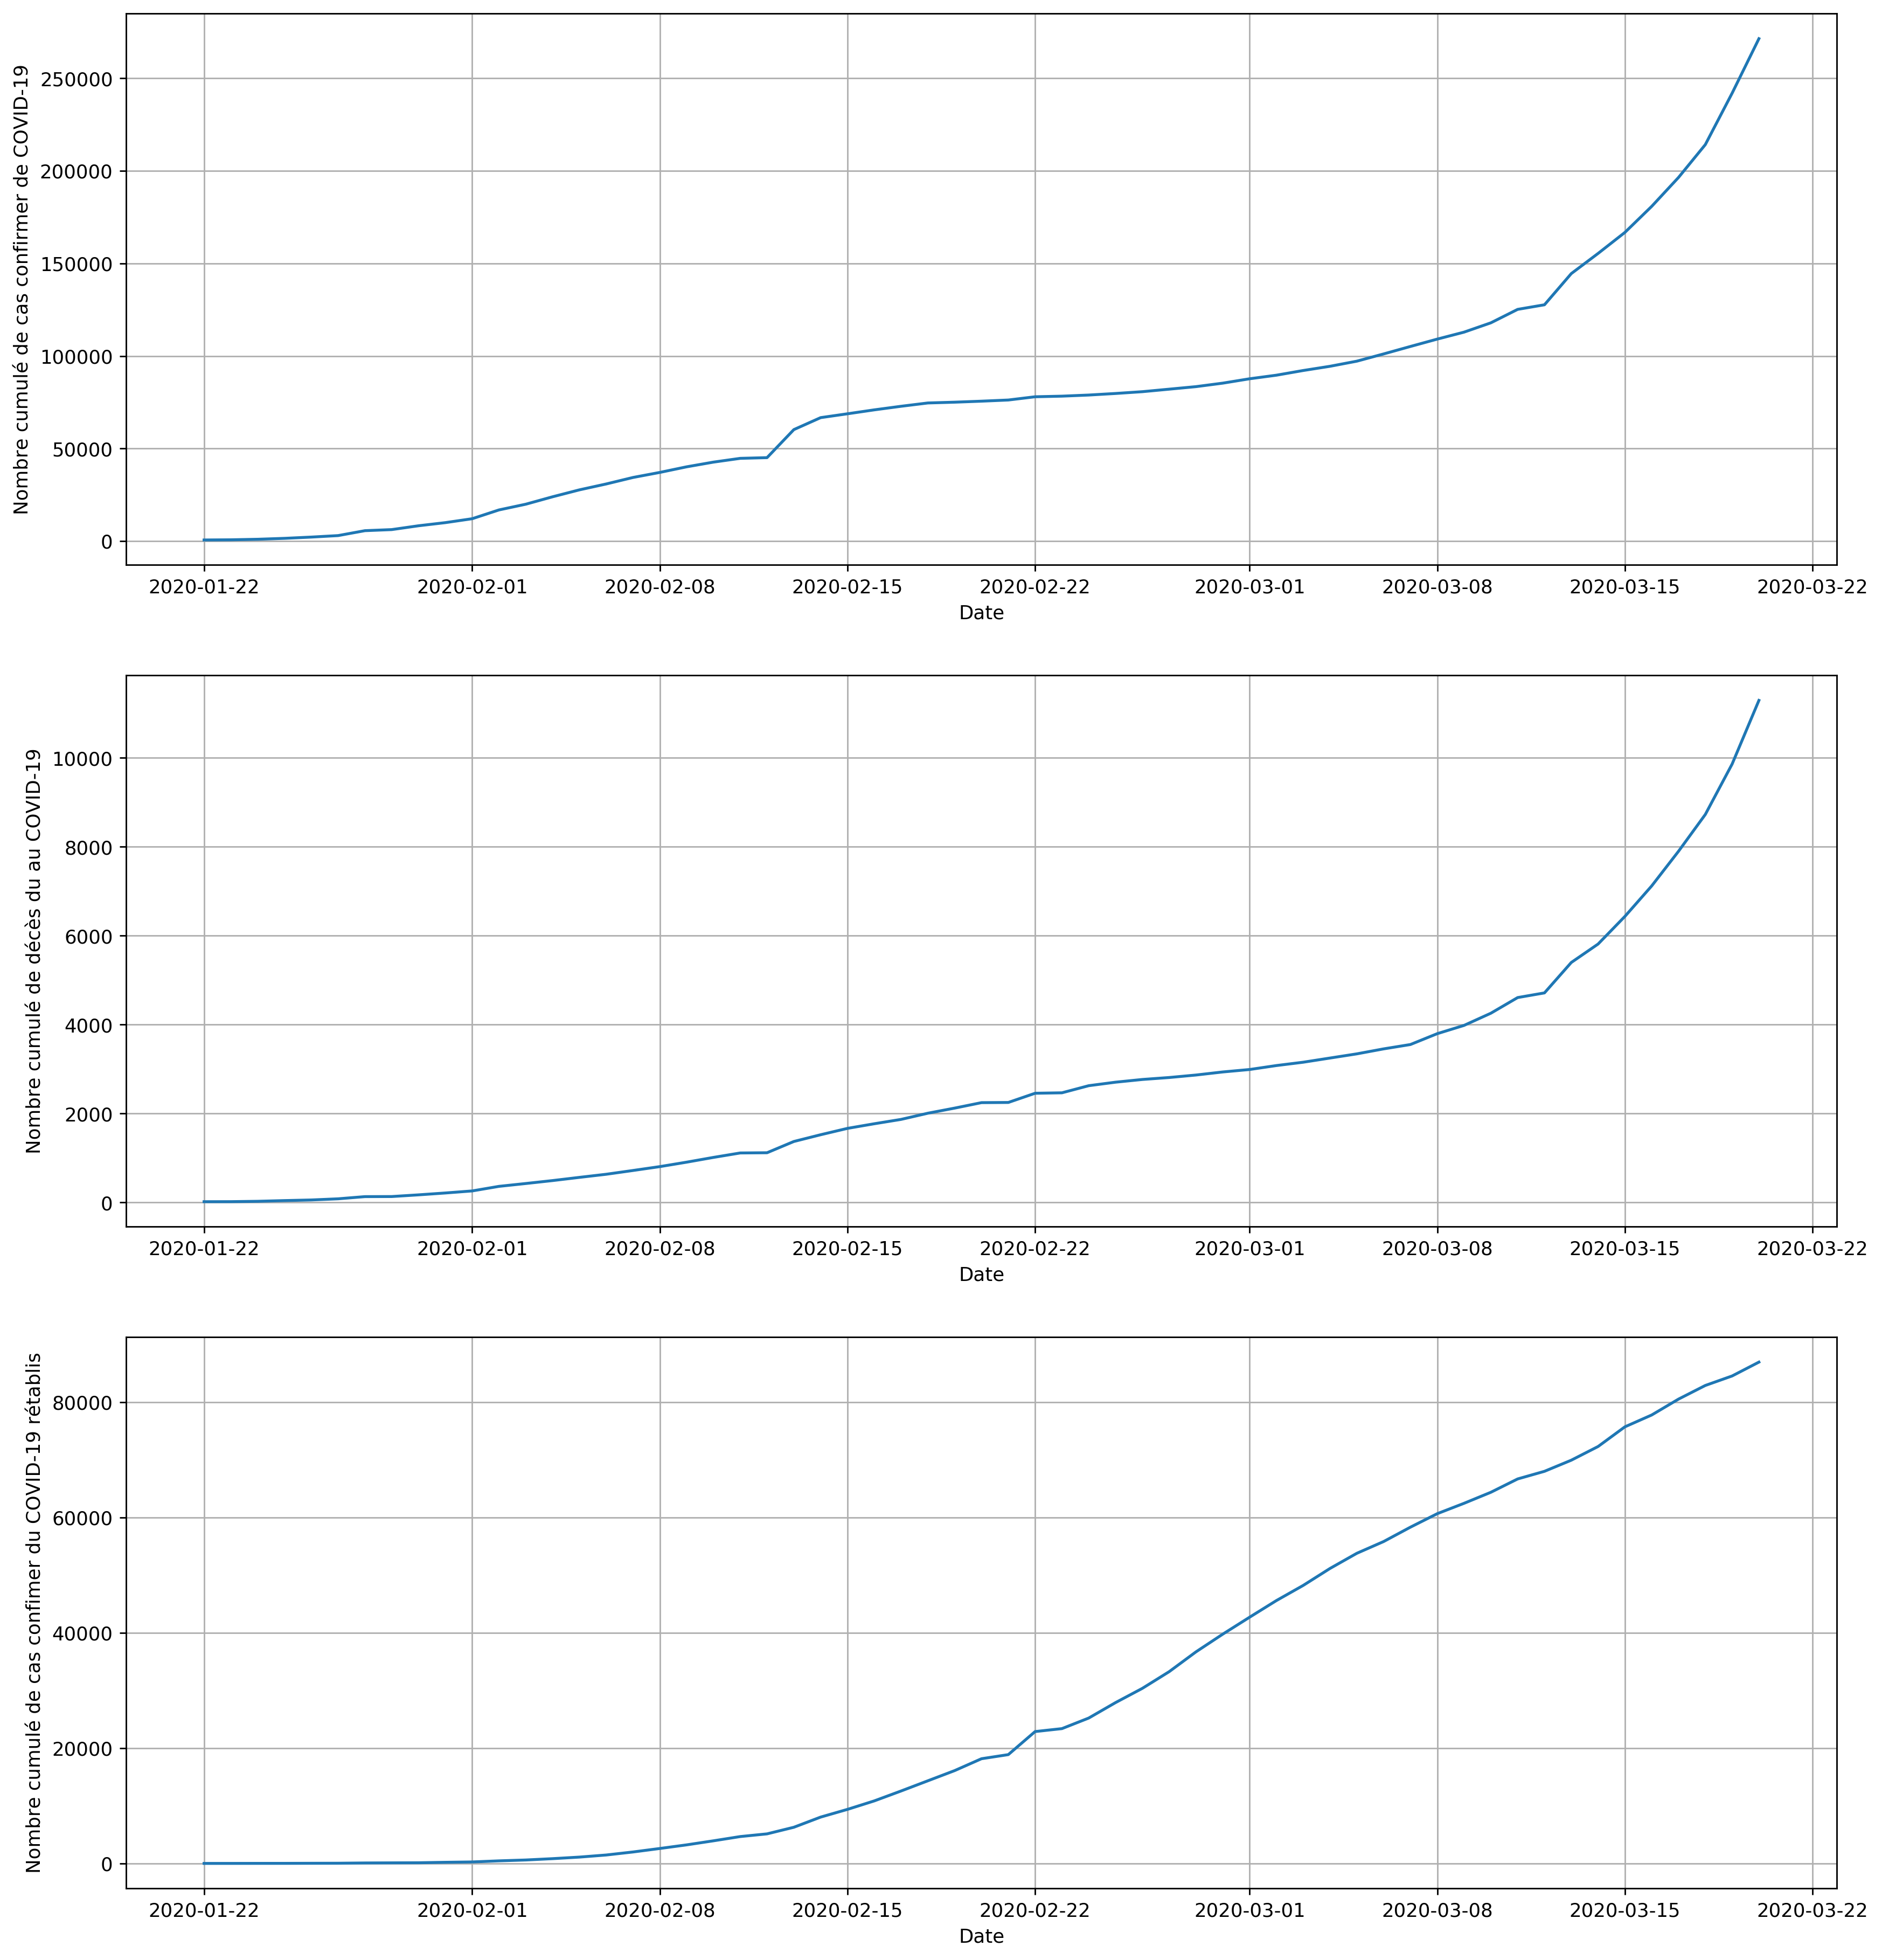

In [285]:
confirmed_Cases_plot = plt.figure(num=1, dpi=256, figsize=(16, 18))

plt.subplot(311)
plt.plot(grouped_covid19_data_by_Date.Confirmed)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confirmer de COVID-19')

plt.subplot(312)
plt.plot(grouped_covid19_data_by_Date.Deaths)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de décès du au COVID-19')

plt.subplot(313)
plt.plot(grouped_covid19_data_by_Date.Recovered)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confimer du COVID-19 rétablis')

plt.show()

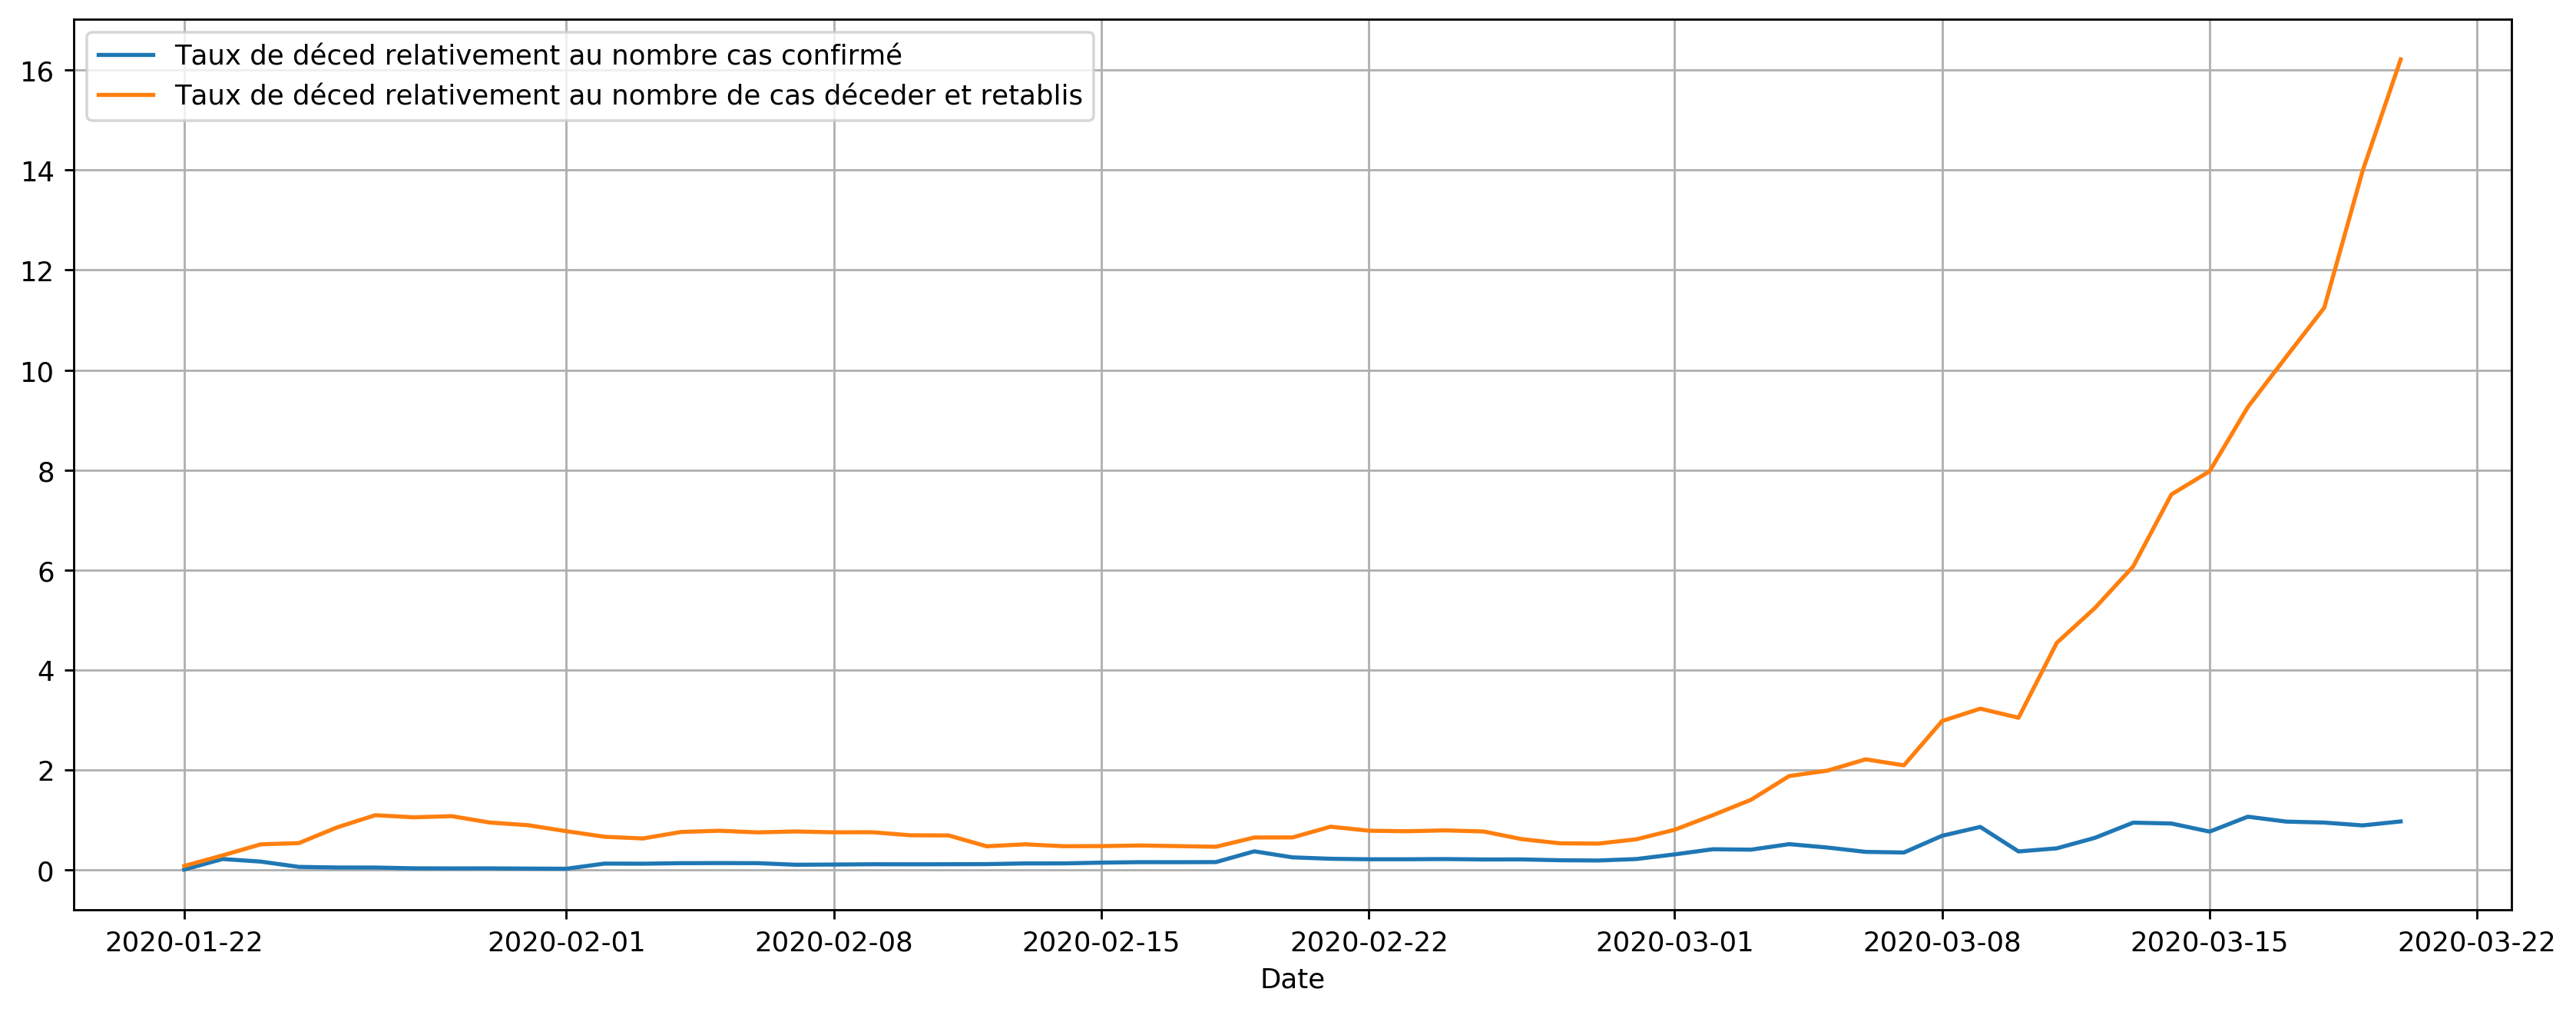

In [276]:
grouped_covid19_kpi_by_Date = Covid19[columns[[4,9,10]]].groupby(by='Date').mean()

confirmed_Cases_plot = plt.figure(num=1, dpi=256, figsize=(16, 6))

plt.plot(grouped_covid19_kpi_by_Date.ADR,
         label = 'Taux de déced relativement au nombre cas confirmé')
plt.plot(grouped_covid19_kpi_by_Date.DRR,
         label = 'Taux de déced relativement au nombre de cas déceder et retablis')
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.legend()

plt.show()

### Visualisation par continent:

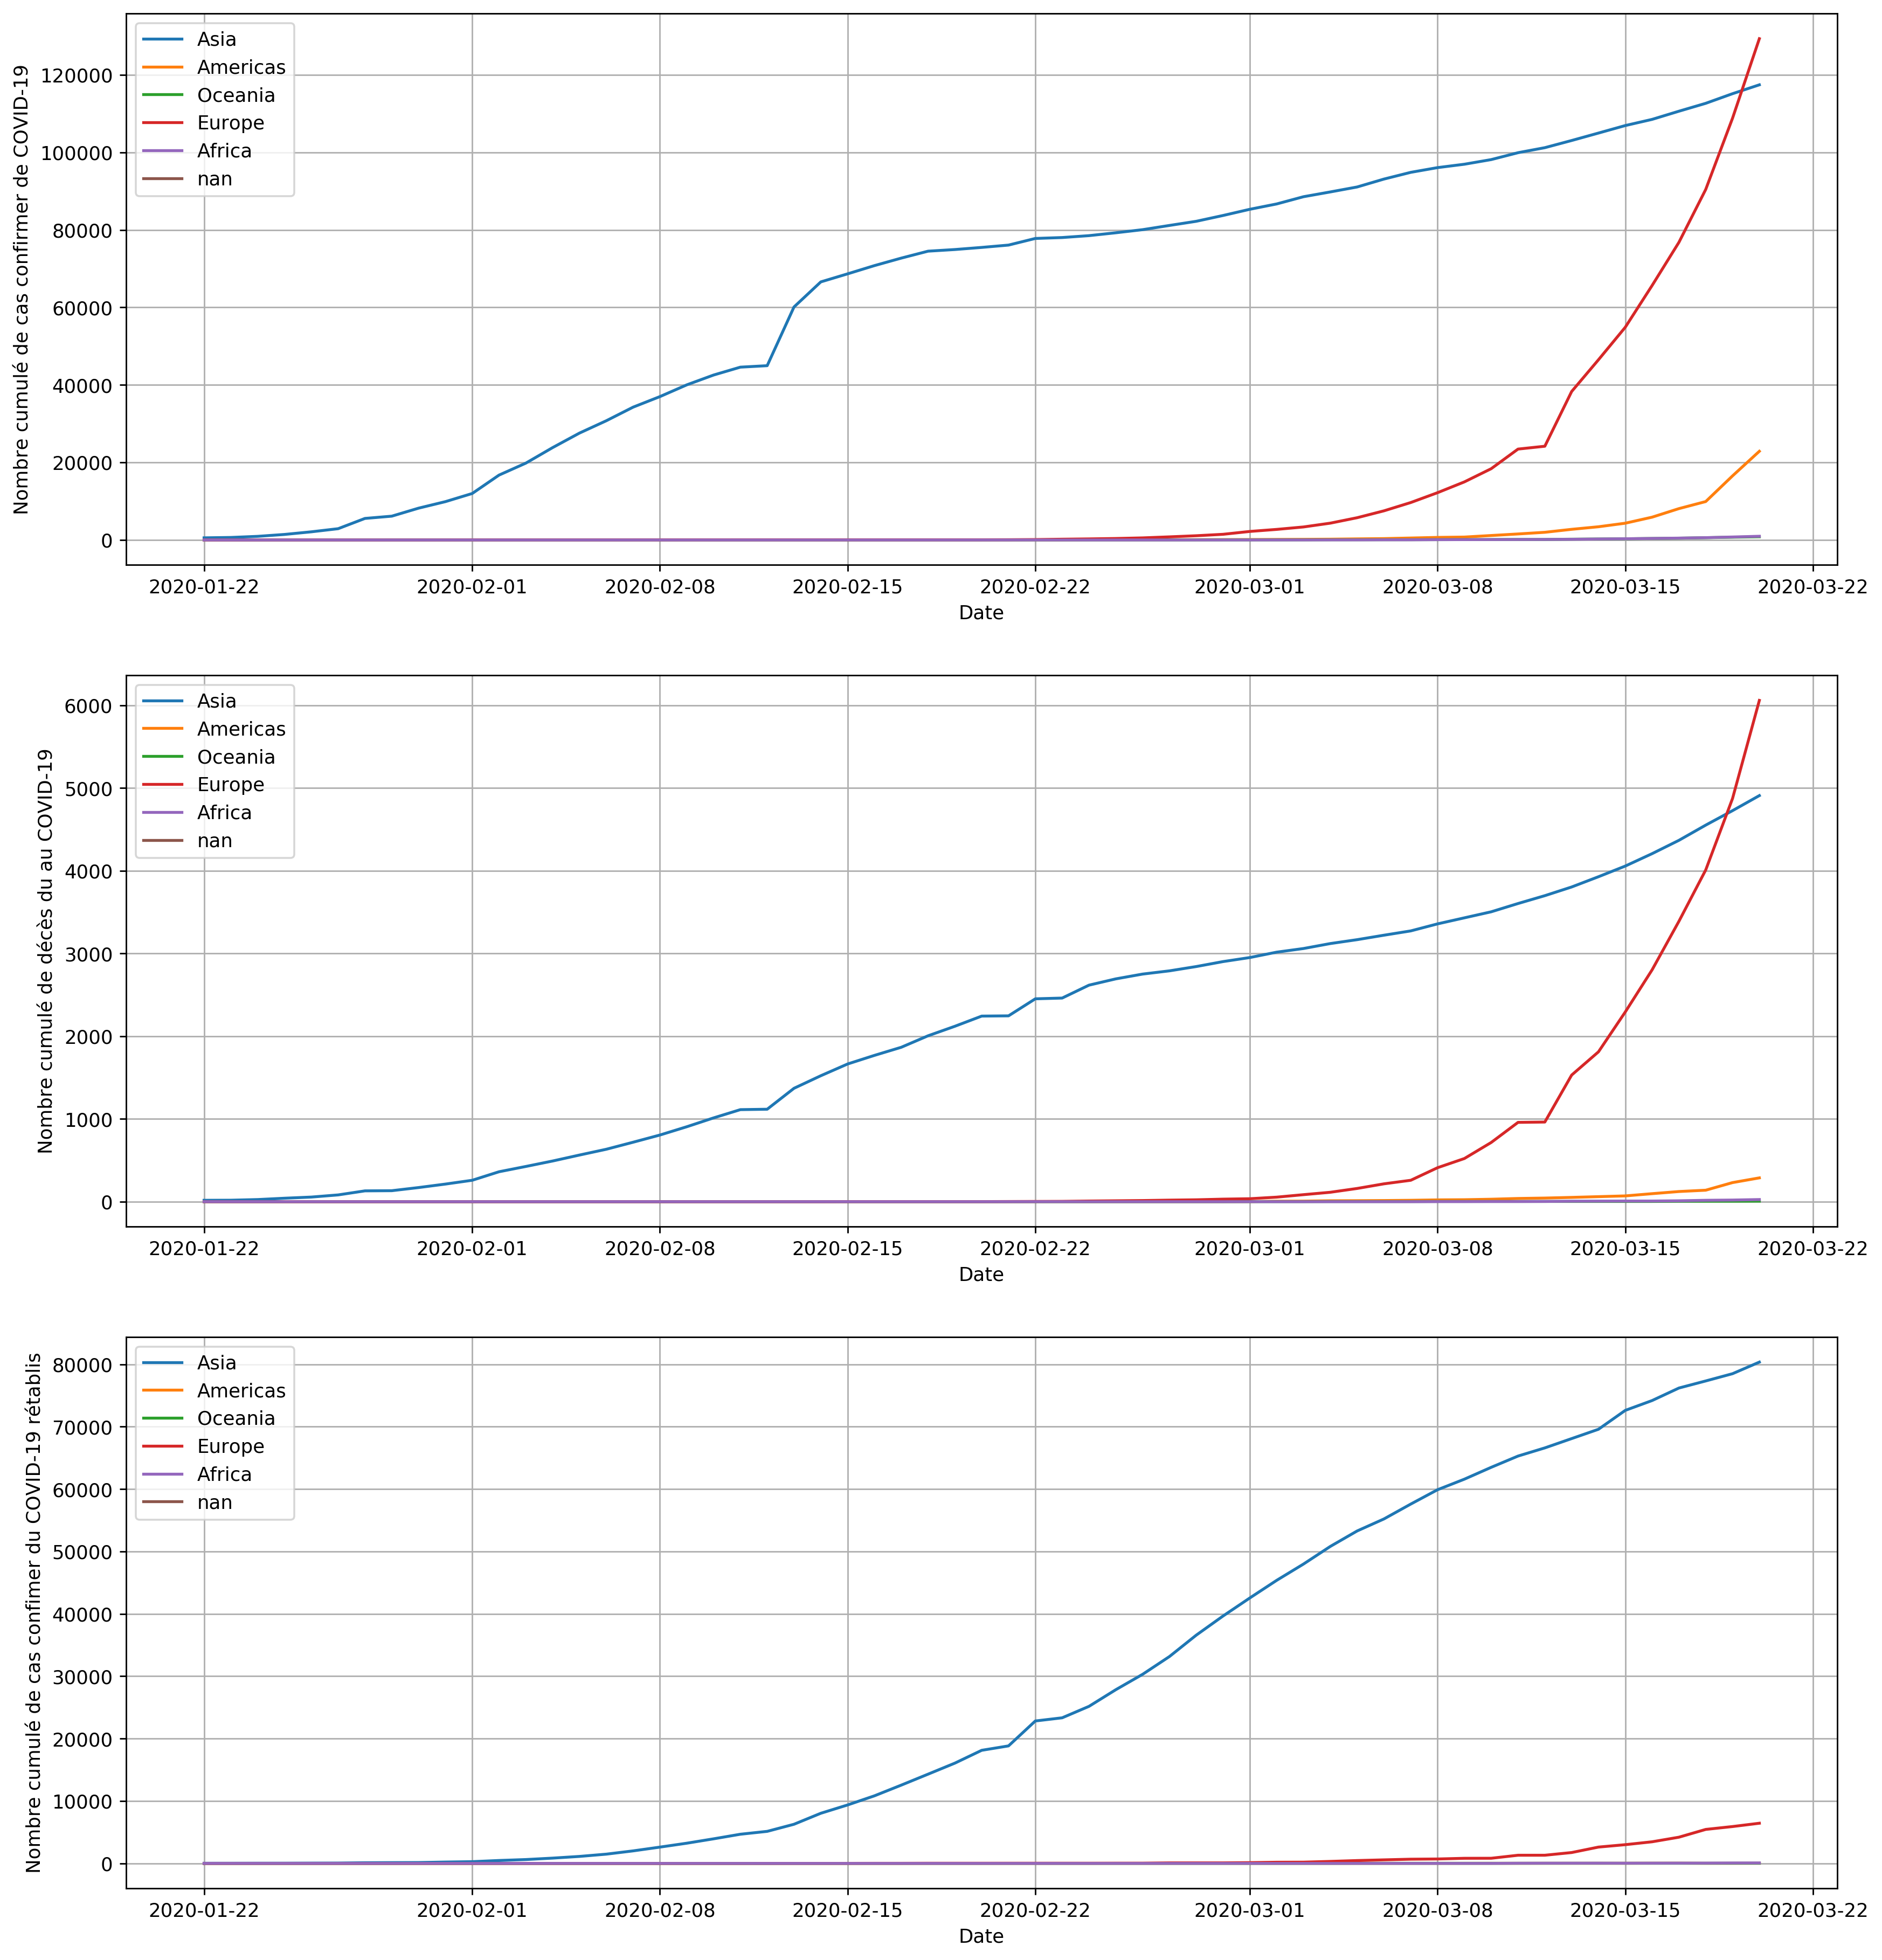

In [286]:
plt.figure(num=1, dpi=256, figsize=(16, 18))

plt.subplot(311)
for continent in Covid19.region.unique():
    data = Covid19.loc[Covid19.region == continent, ['Date', 'Confirmed']].groupby(by='Date').sum()
    plt.plot(data.Confirmed, label=continent)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confirmer de COVID-19')
plt.legend()

plt.subplot(312)
for continent in Covid19.region.unique():
    data = Covid19.loc[Covid19.region == continent, ['Date', 'Deaths']].groupby(by='Date').sum()
    plt.plot(data.Deaths, label=continent)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de décès du au COVID-19')
plt.legend()

plt.subplot(313)
for continent in Covid19.region.unique():
    data = Covid19.loc[Covid19.region == continent, ['Date', 'Recovered']].groupby(by='Date').sum()
    plt.plot(data.Recovered, label=continent)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confimer du COVID-19 rétablis')
plt.legend()
    
plt.show()

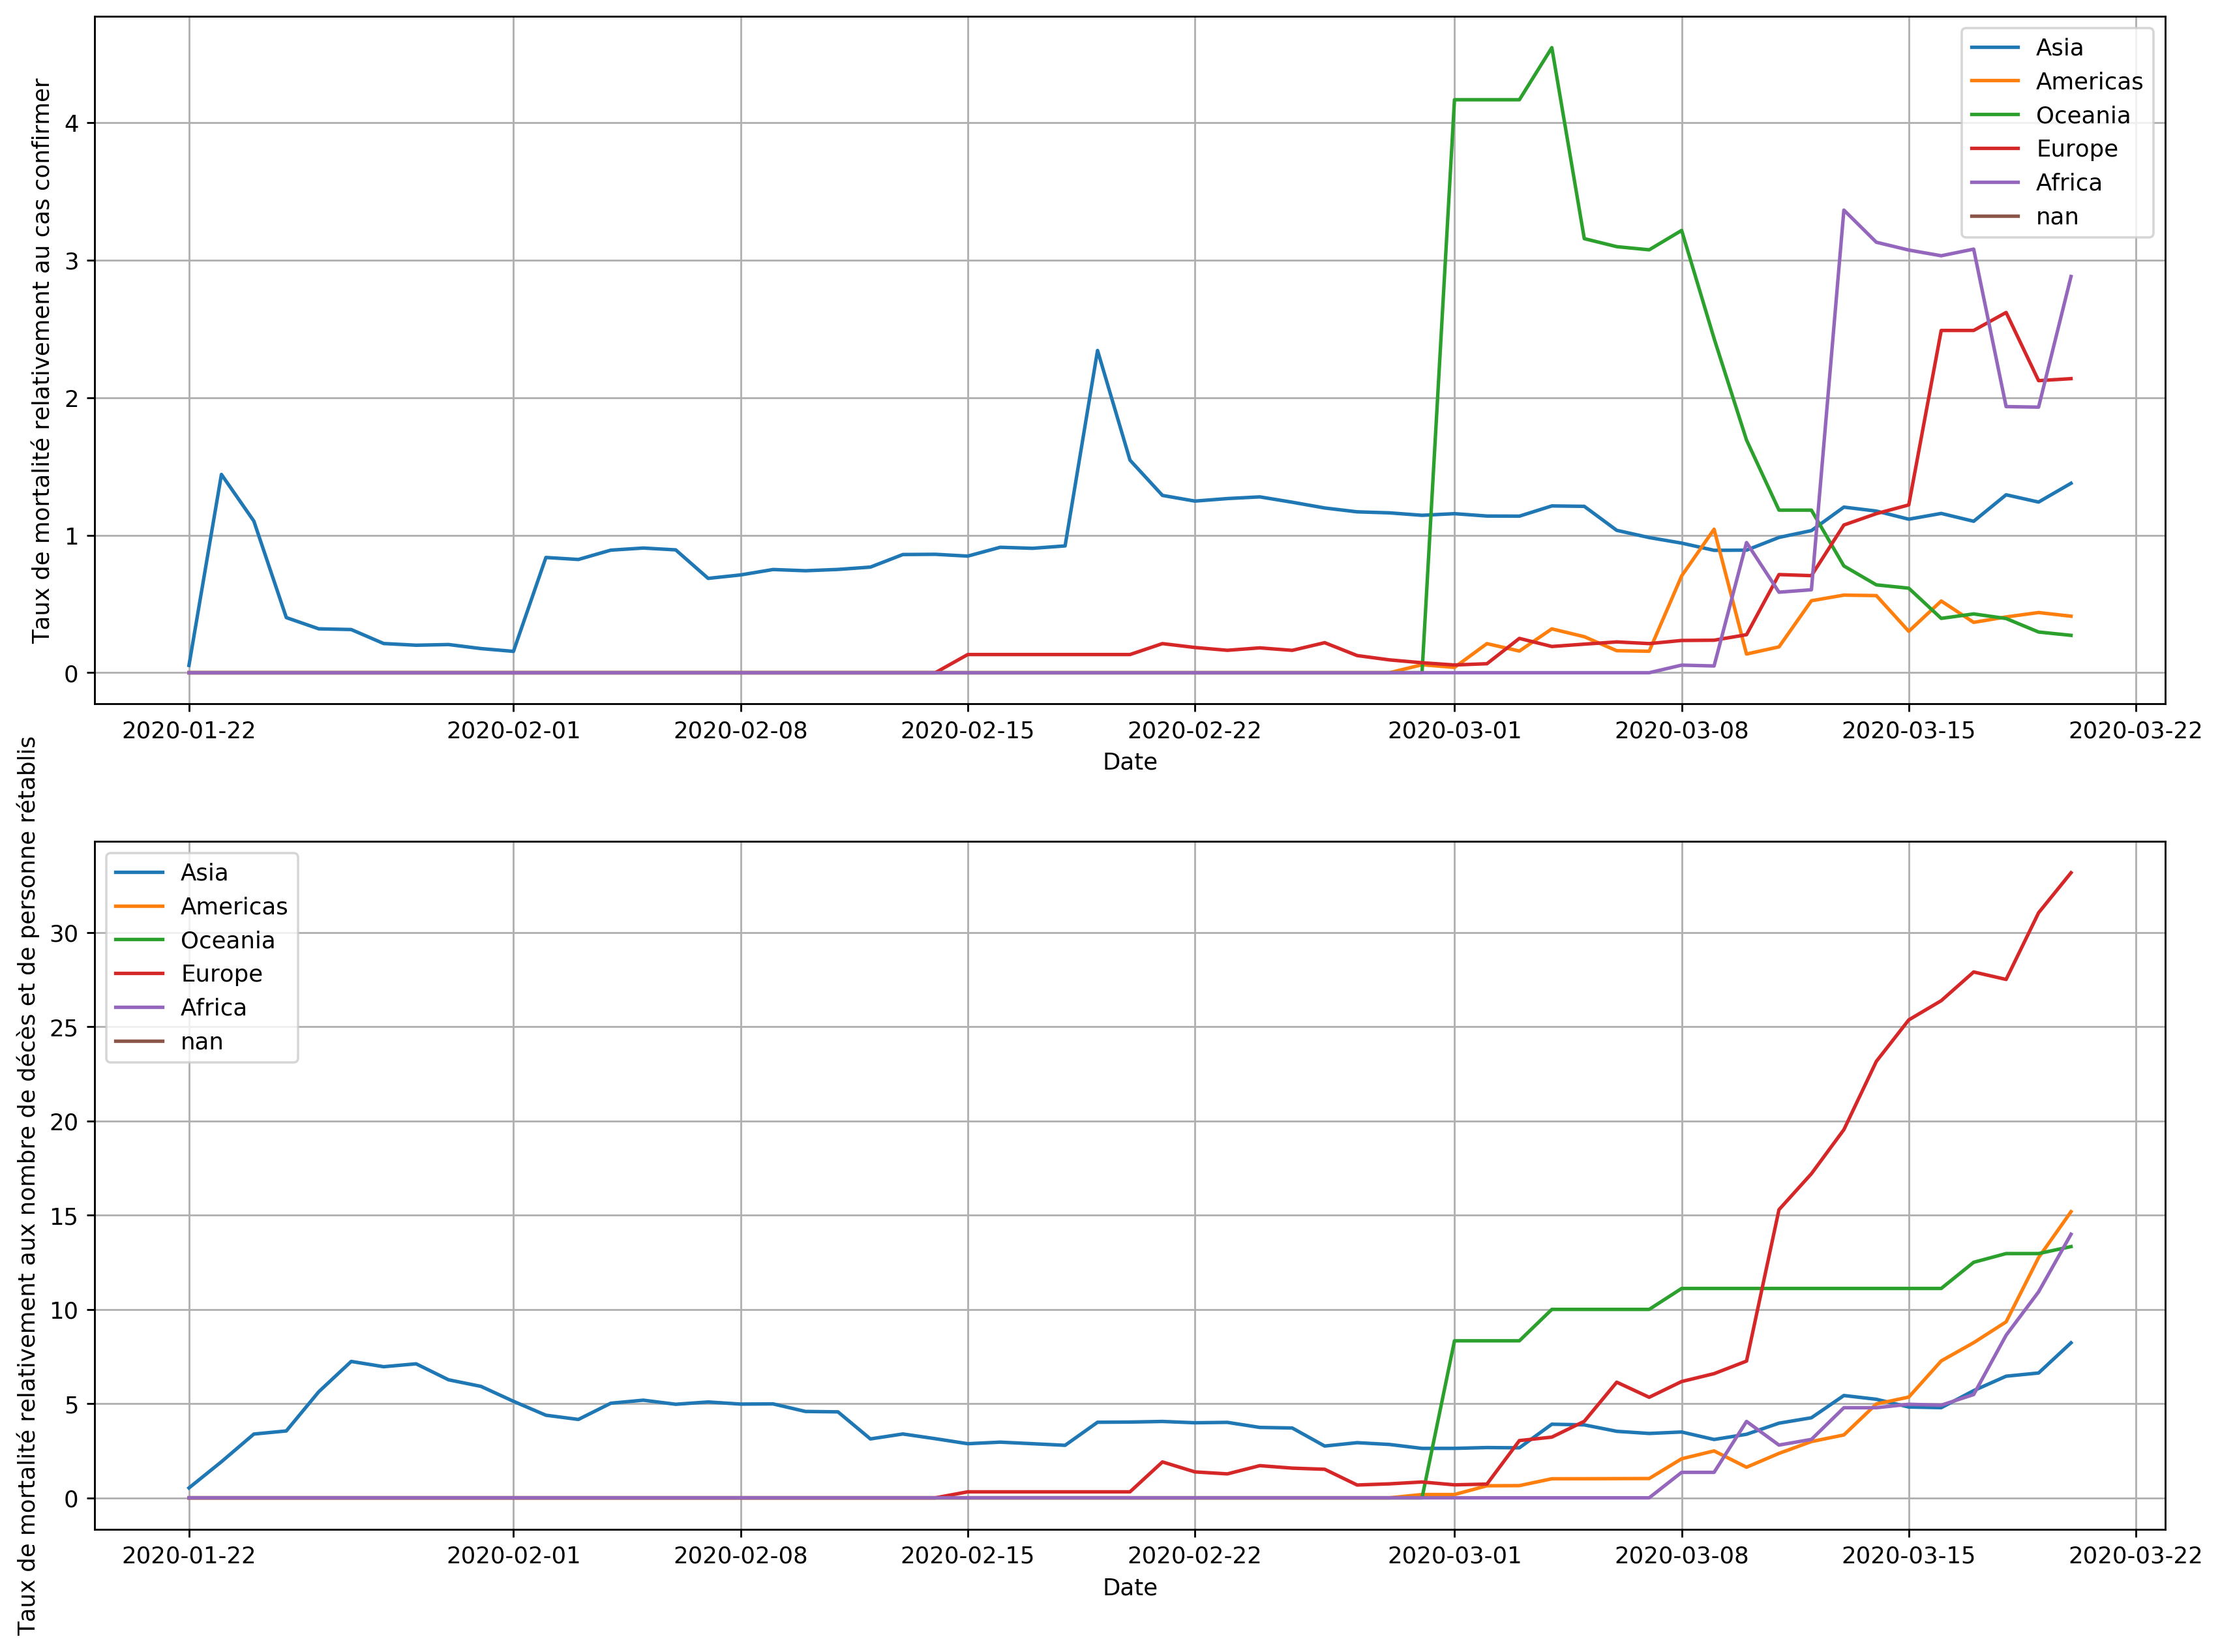

In [278]:
plt.figure(num=1, dpi=256, figsize=(16, 12))

plt.subplot(211)
for continent in Covid19.region.unique():
    data = Covid19.loc[Covid19.region == continent, ['Date', 'ADR']].groupby(by='Date').mean()
    plt.plot(data.ADR, label=continent)

plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Taux de mortalité relativement au cas confirmer')
plt.legend()

plt.subplot(212)
for continent in Covid19.region.unique():
    data = Covid19.loc[Covid19.region == continent, ['Date', 'DRR']].groupby(by='Date').mean()
    plt.plot(data.DRR, label=continent)

plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Taux de mortalité relativement aux nombre de décès et de personne rétablis')
plt.legend()

plt.show()

### Afrique:

In [279]:
Covid19_Afrique = Covid19.loc[Covid19.region == "Africa"]

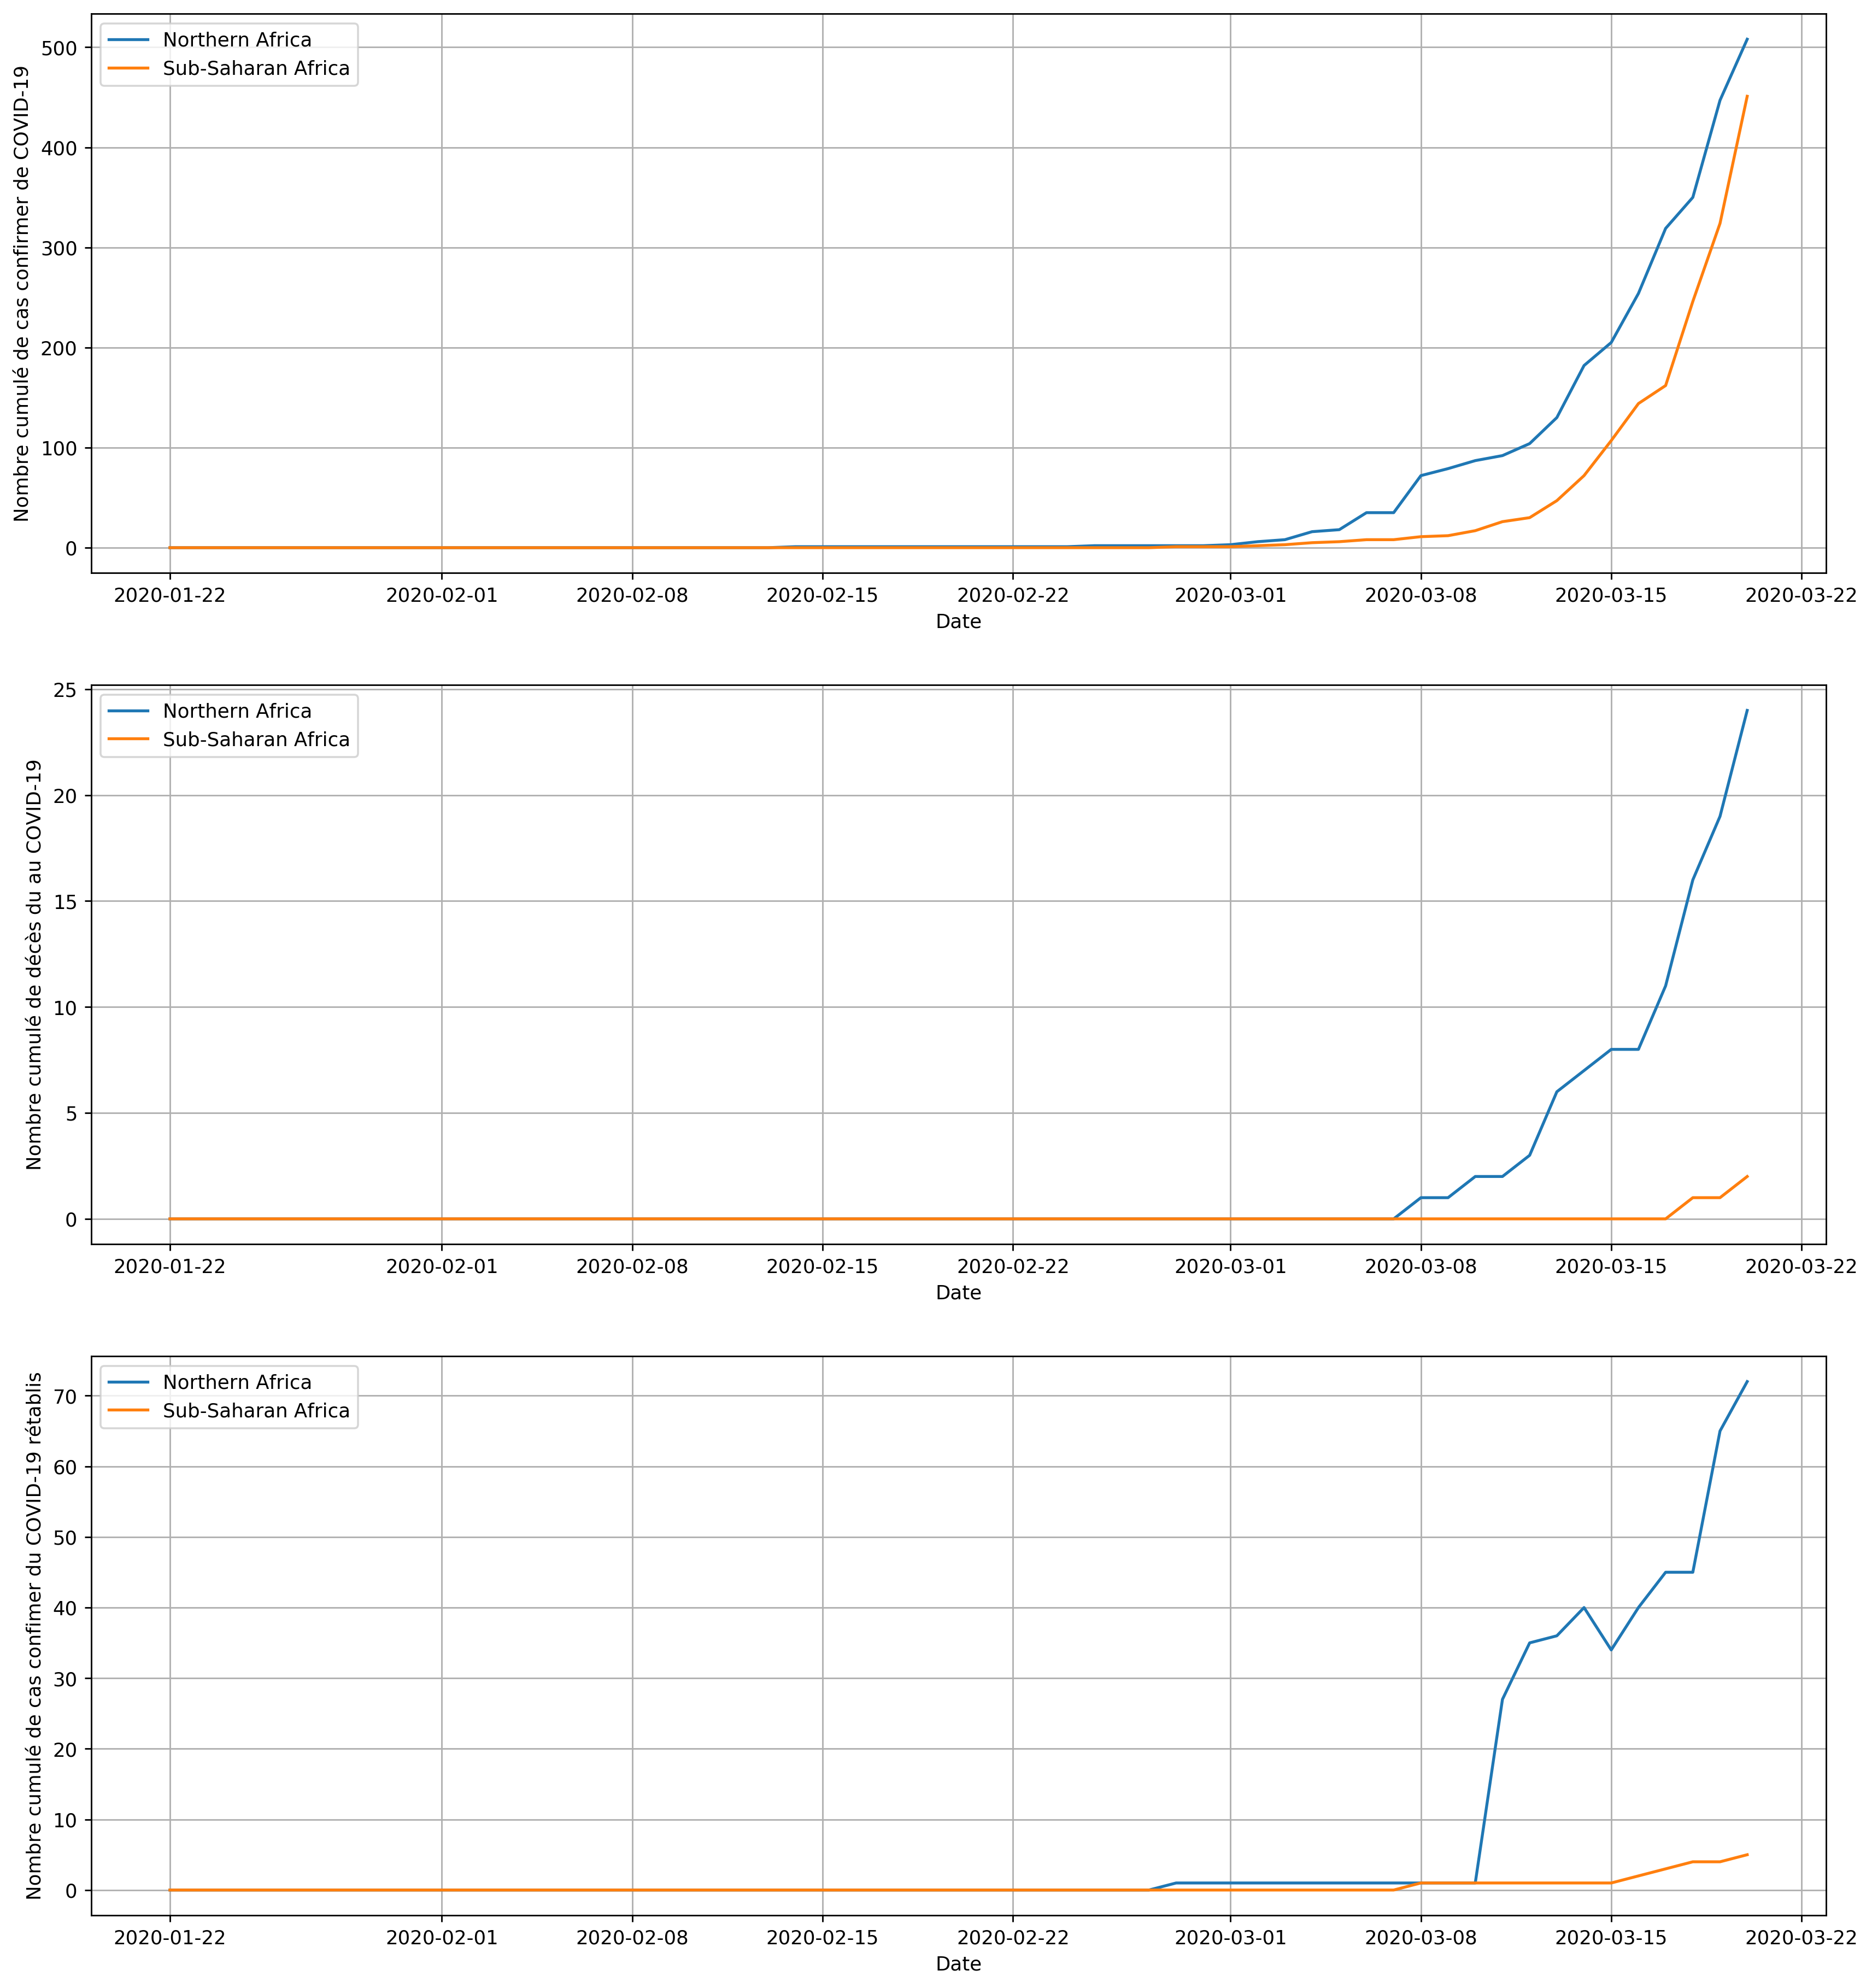

In [280]:
plt.figure(num=1, dpi=256, figsize=(16, 18))

plt.subplot(311)
for sub in Covid19_Afrique['sub-region'].unique():
    data = Covid19_Afrique.loc[Covid19_Afrique['sub-region'] == sub, ['Date', 'Confirmed']].groupby(by='Date').sum()
    plt.plot(data.Confirmed, label=sub)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confirmer de COVID-19')
plt.legend()

plt.subplot(312)
for sub in Covid19_Afrique['sub-region'].unique():
    data = Covid19_Afrique.loc[Covid19_Afrique['sub-region'] == sub, ['Date', 'Deaths']].groupby(by='Date').sum()
    plt.plot(data.Deaths, label=sub)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de décès du au COVID-19')
plt.legend()

plt.subplot(313)
for sub in Covid19_Afrique['sub-region'].unique():
    data = Covid19_Afrique.loc[Covid19_Afrique['sub-region'] == sub, ['Date', 'Recovered']].groupby(by='Date').sum()
    plt.plot(data.Recovered, label=sub)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confimer du COVID-19 rétablis')
plt.legend()
    
plt.show()

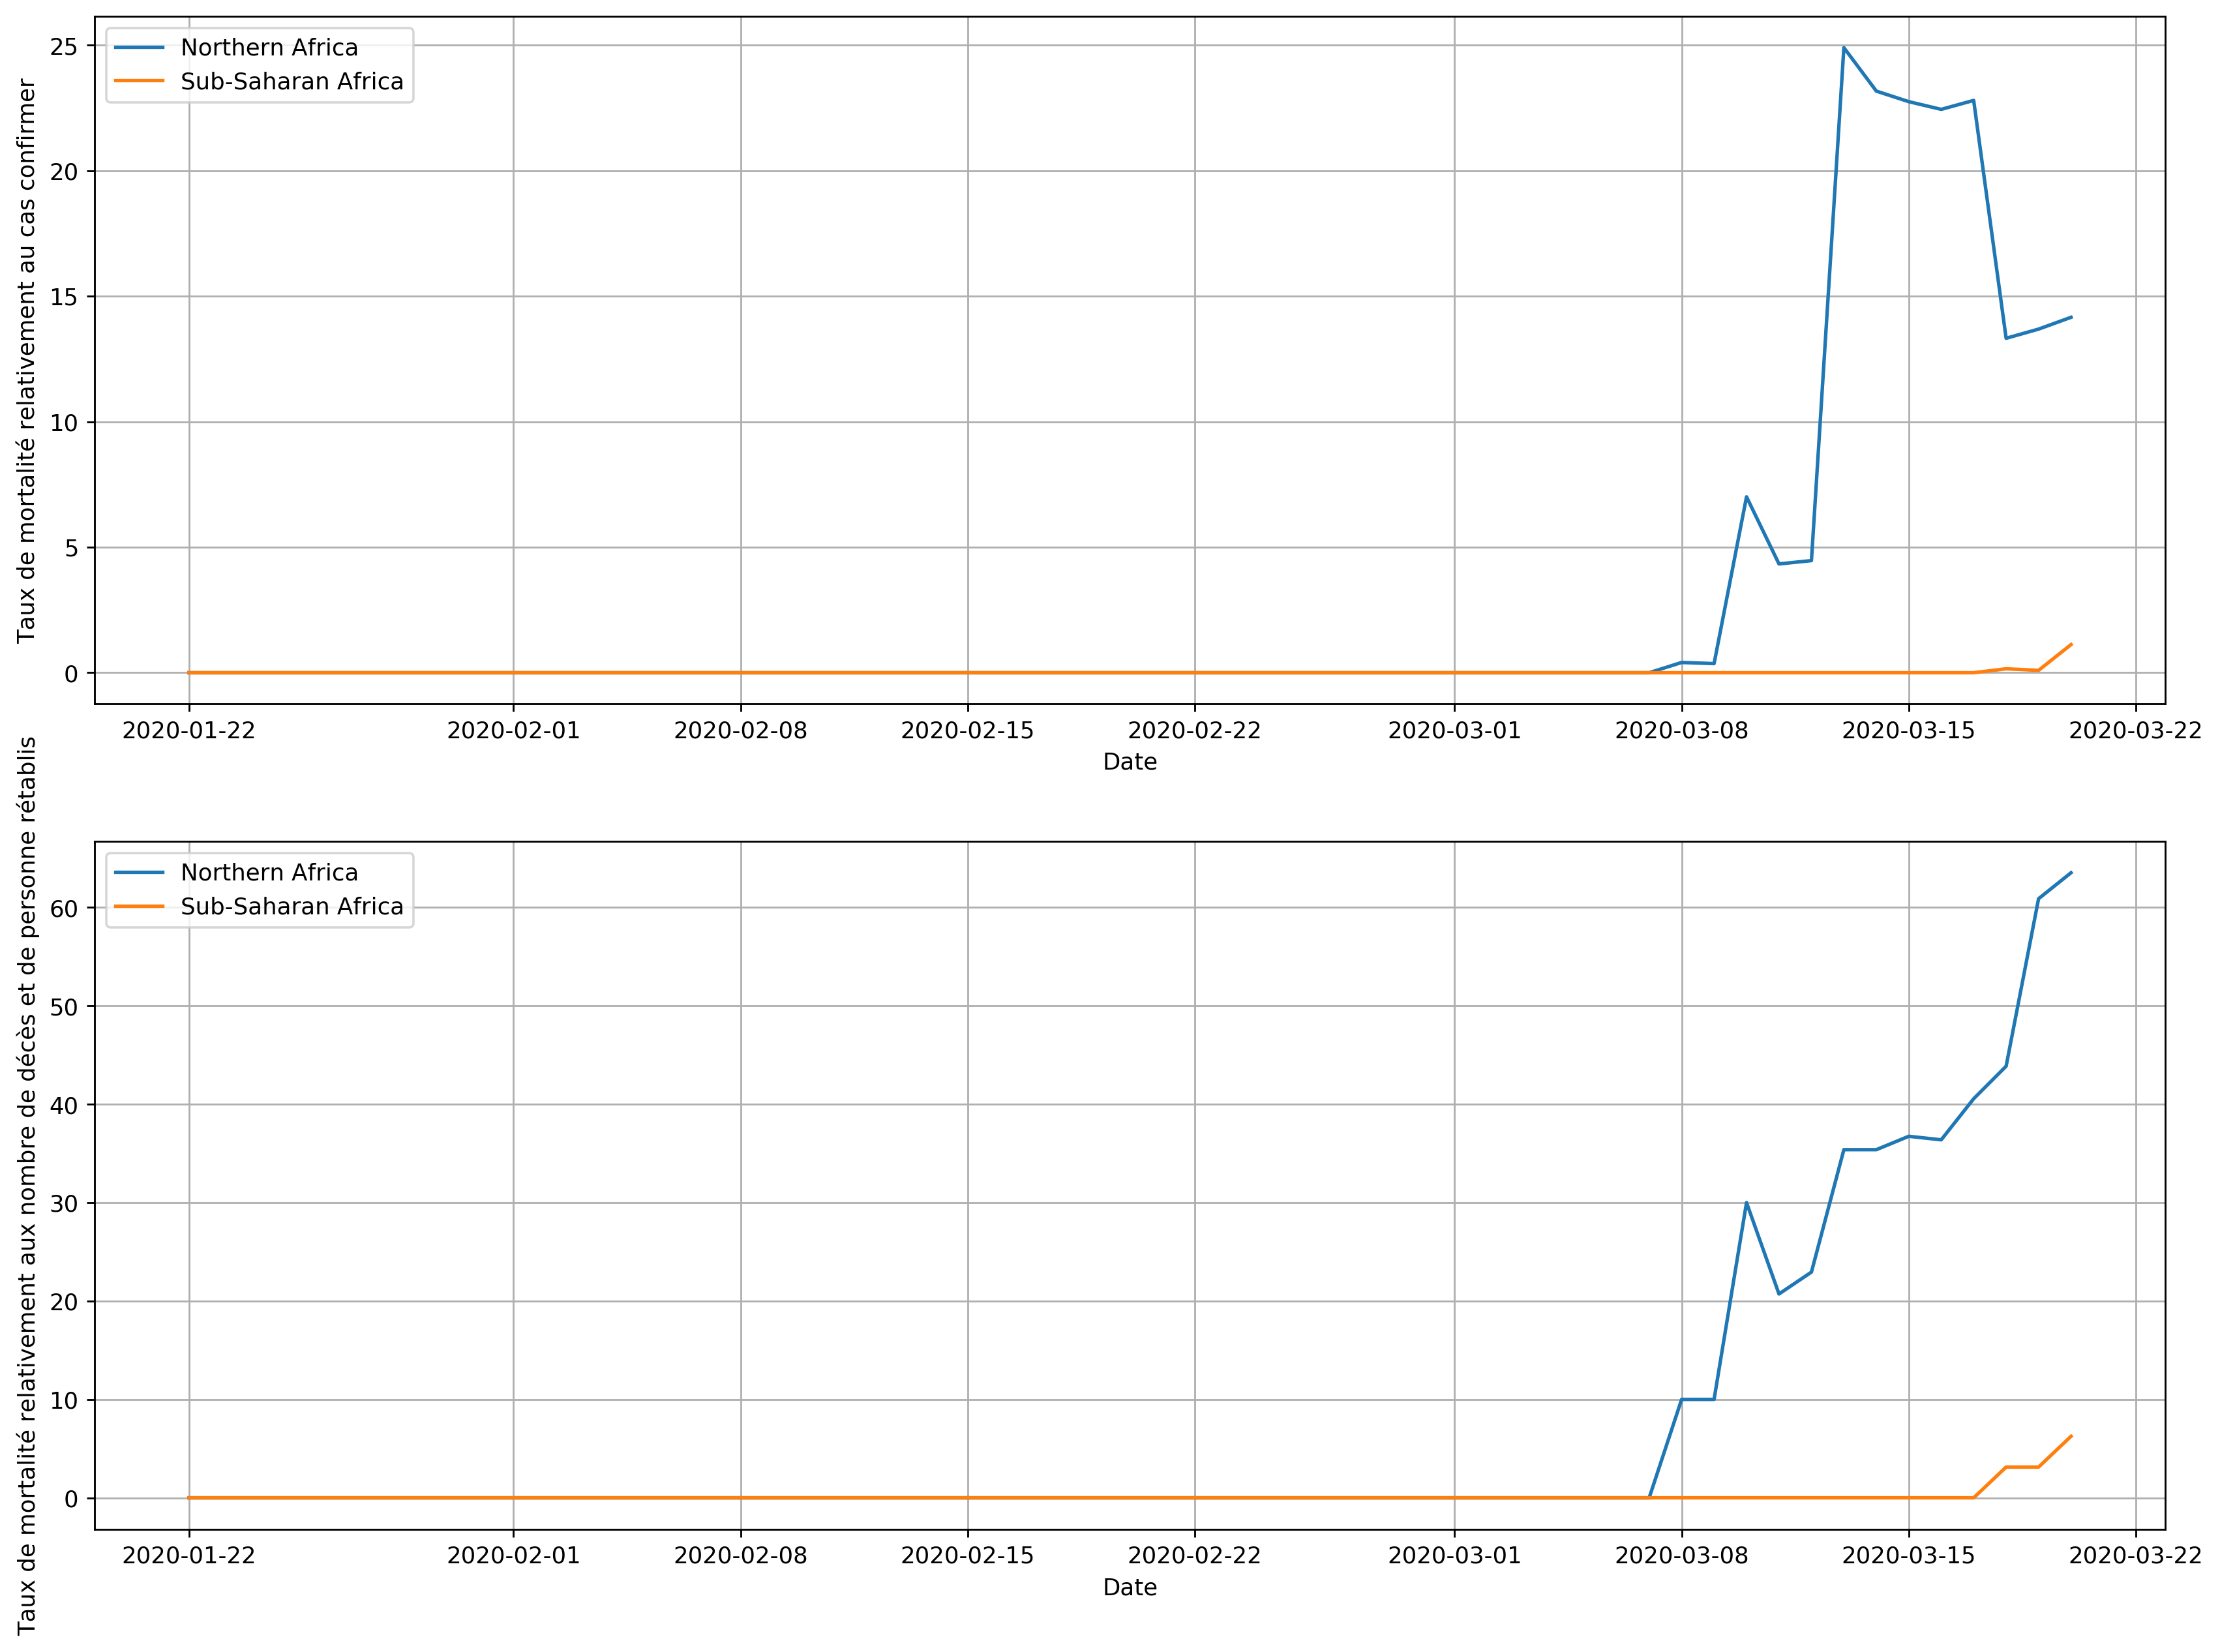

In [282]:
plt.figure(num=1, dpi=256, figsize=(16, 12))

plt.subplot(211)
for sub in Covid19_Afrique['sub-region'].unique():
    data = Covid19_Afrique.loc[ Covid19_Afrique['sub-region'] == sub, ['Date', 'ADR']].groupby(by='Date').mean()
    plt.plot(data.ADR, label=sub)

plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Taux de mortalité relativement au cas confirmer')
plt.legend()

plt.subplot(212)
for sub in Covid19_Afrique['sub-region'].unique():
    data = Covid19_Afrique.loc[ Covid19_Afrique['sub-region'] == sub, ['Date', 'DRR']].groupby(by='Date').mean()
    plt.plot(data.DRR, label=sub)

plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Taux de mortalité relativement aux nombre de décès et de personne rétablis')
plt.legend()

plt.show()

### Aftique du nord:

In [318]:
Covid19_NorthAf = Covid19.loc[Covid19['sub-region'] == 'Northern Africa']

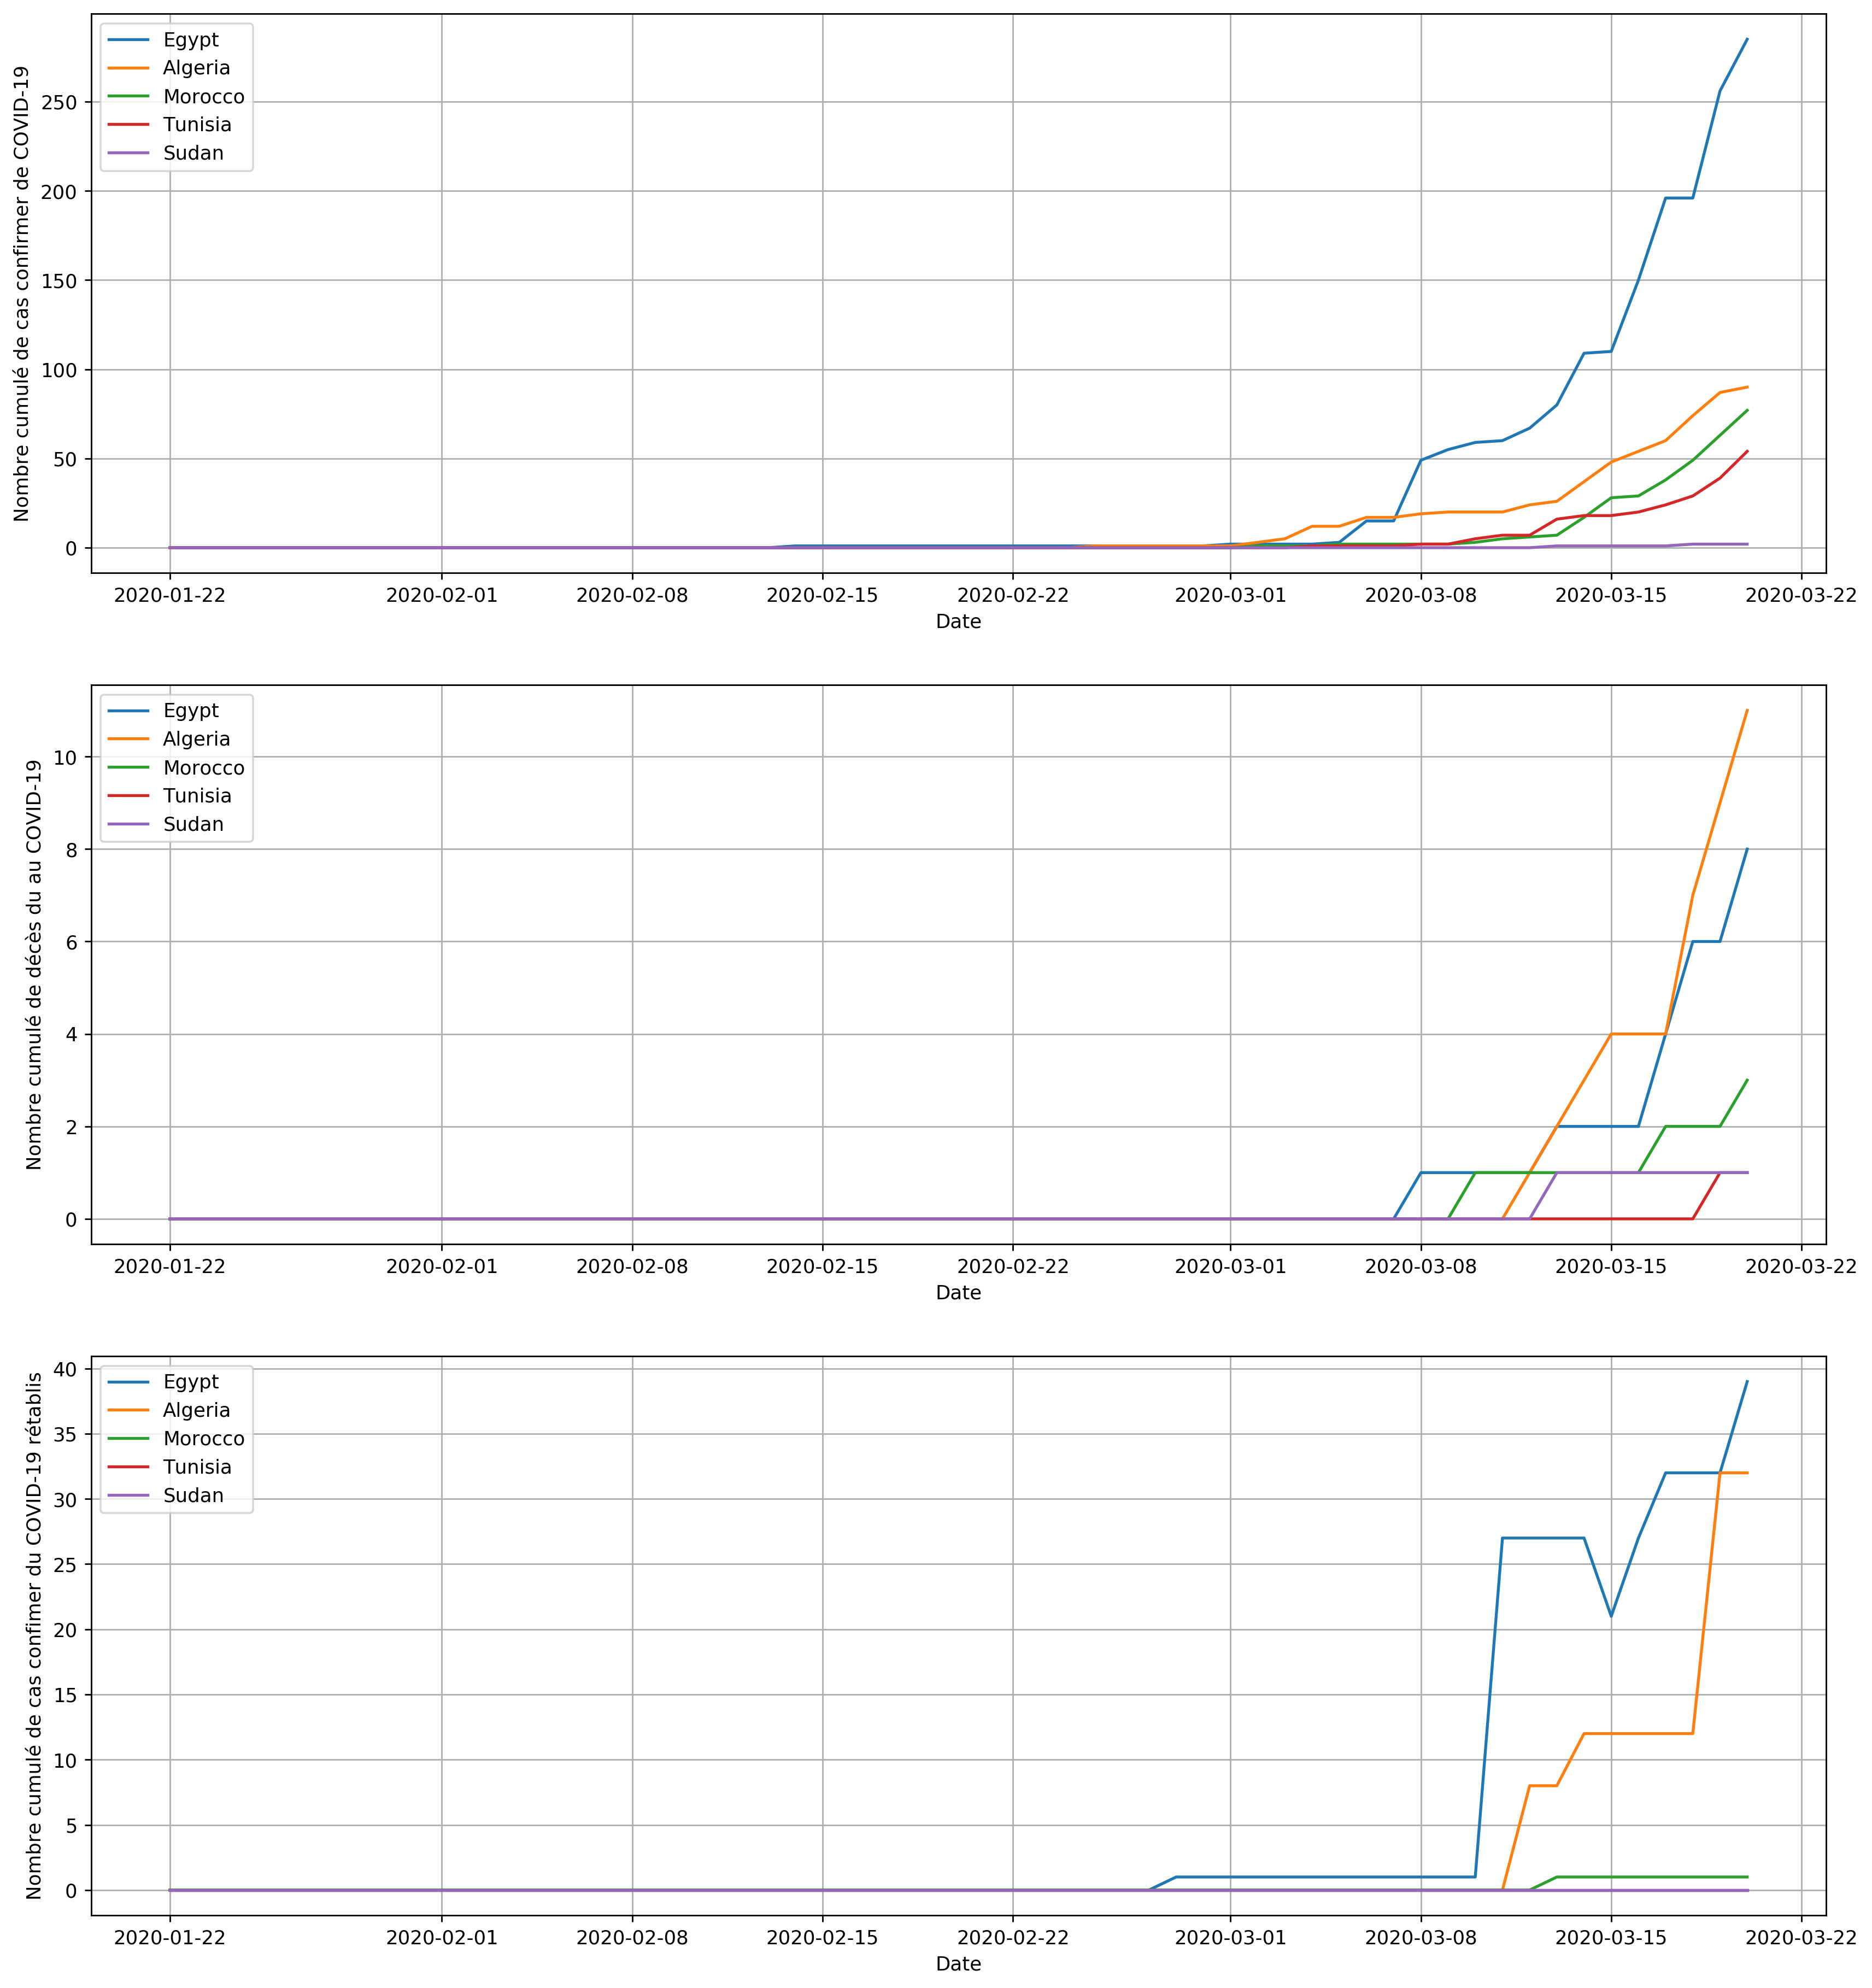

In [319]:
plt.figure(num=1, dpi=256, figsize=(16, 18))

plt.subplot(311)
for country in Covid19_NorthAf['Country/Region'].unique():
    data = Covid19_NorthAf.loc[Covid19_NorthAf['Country/Region'] == country, ['Date', 'Confirmed']].groupby(by='Date').sum()
    plt.plot(data.Confirmed, label=country)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confirmer de COVID-19')
plt.legend()

plt.subplot(312)
for country in Covid19_NorthAf['Country/Region'].unique():
    data = Covid19_NorthAf.loc[Covid19_NorthAf['Country/Region'] == country, ['Date', 'Deaths']].groupby(by='Date').sum()
    plt.plot(data.Deaths, label=country)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de décès du au COVID-19')
plt.legend()

plt.subplot(313)
for country in Covid19_NorthAf['Country/Region'].unique():
    data = Covid19_NorthAf.loc[Covid19_NorthAf['Country/Region'] == country, ['Date', 'Recovered']].groupby(by='Date').sum()
    plt.plot(data.Recovered, label=country)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confimer du COVID-19 rétablis')
plt.legend()
    
plt.show()

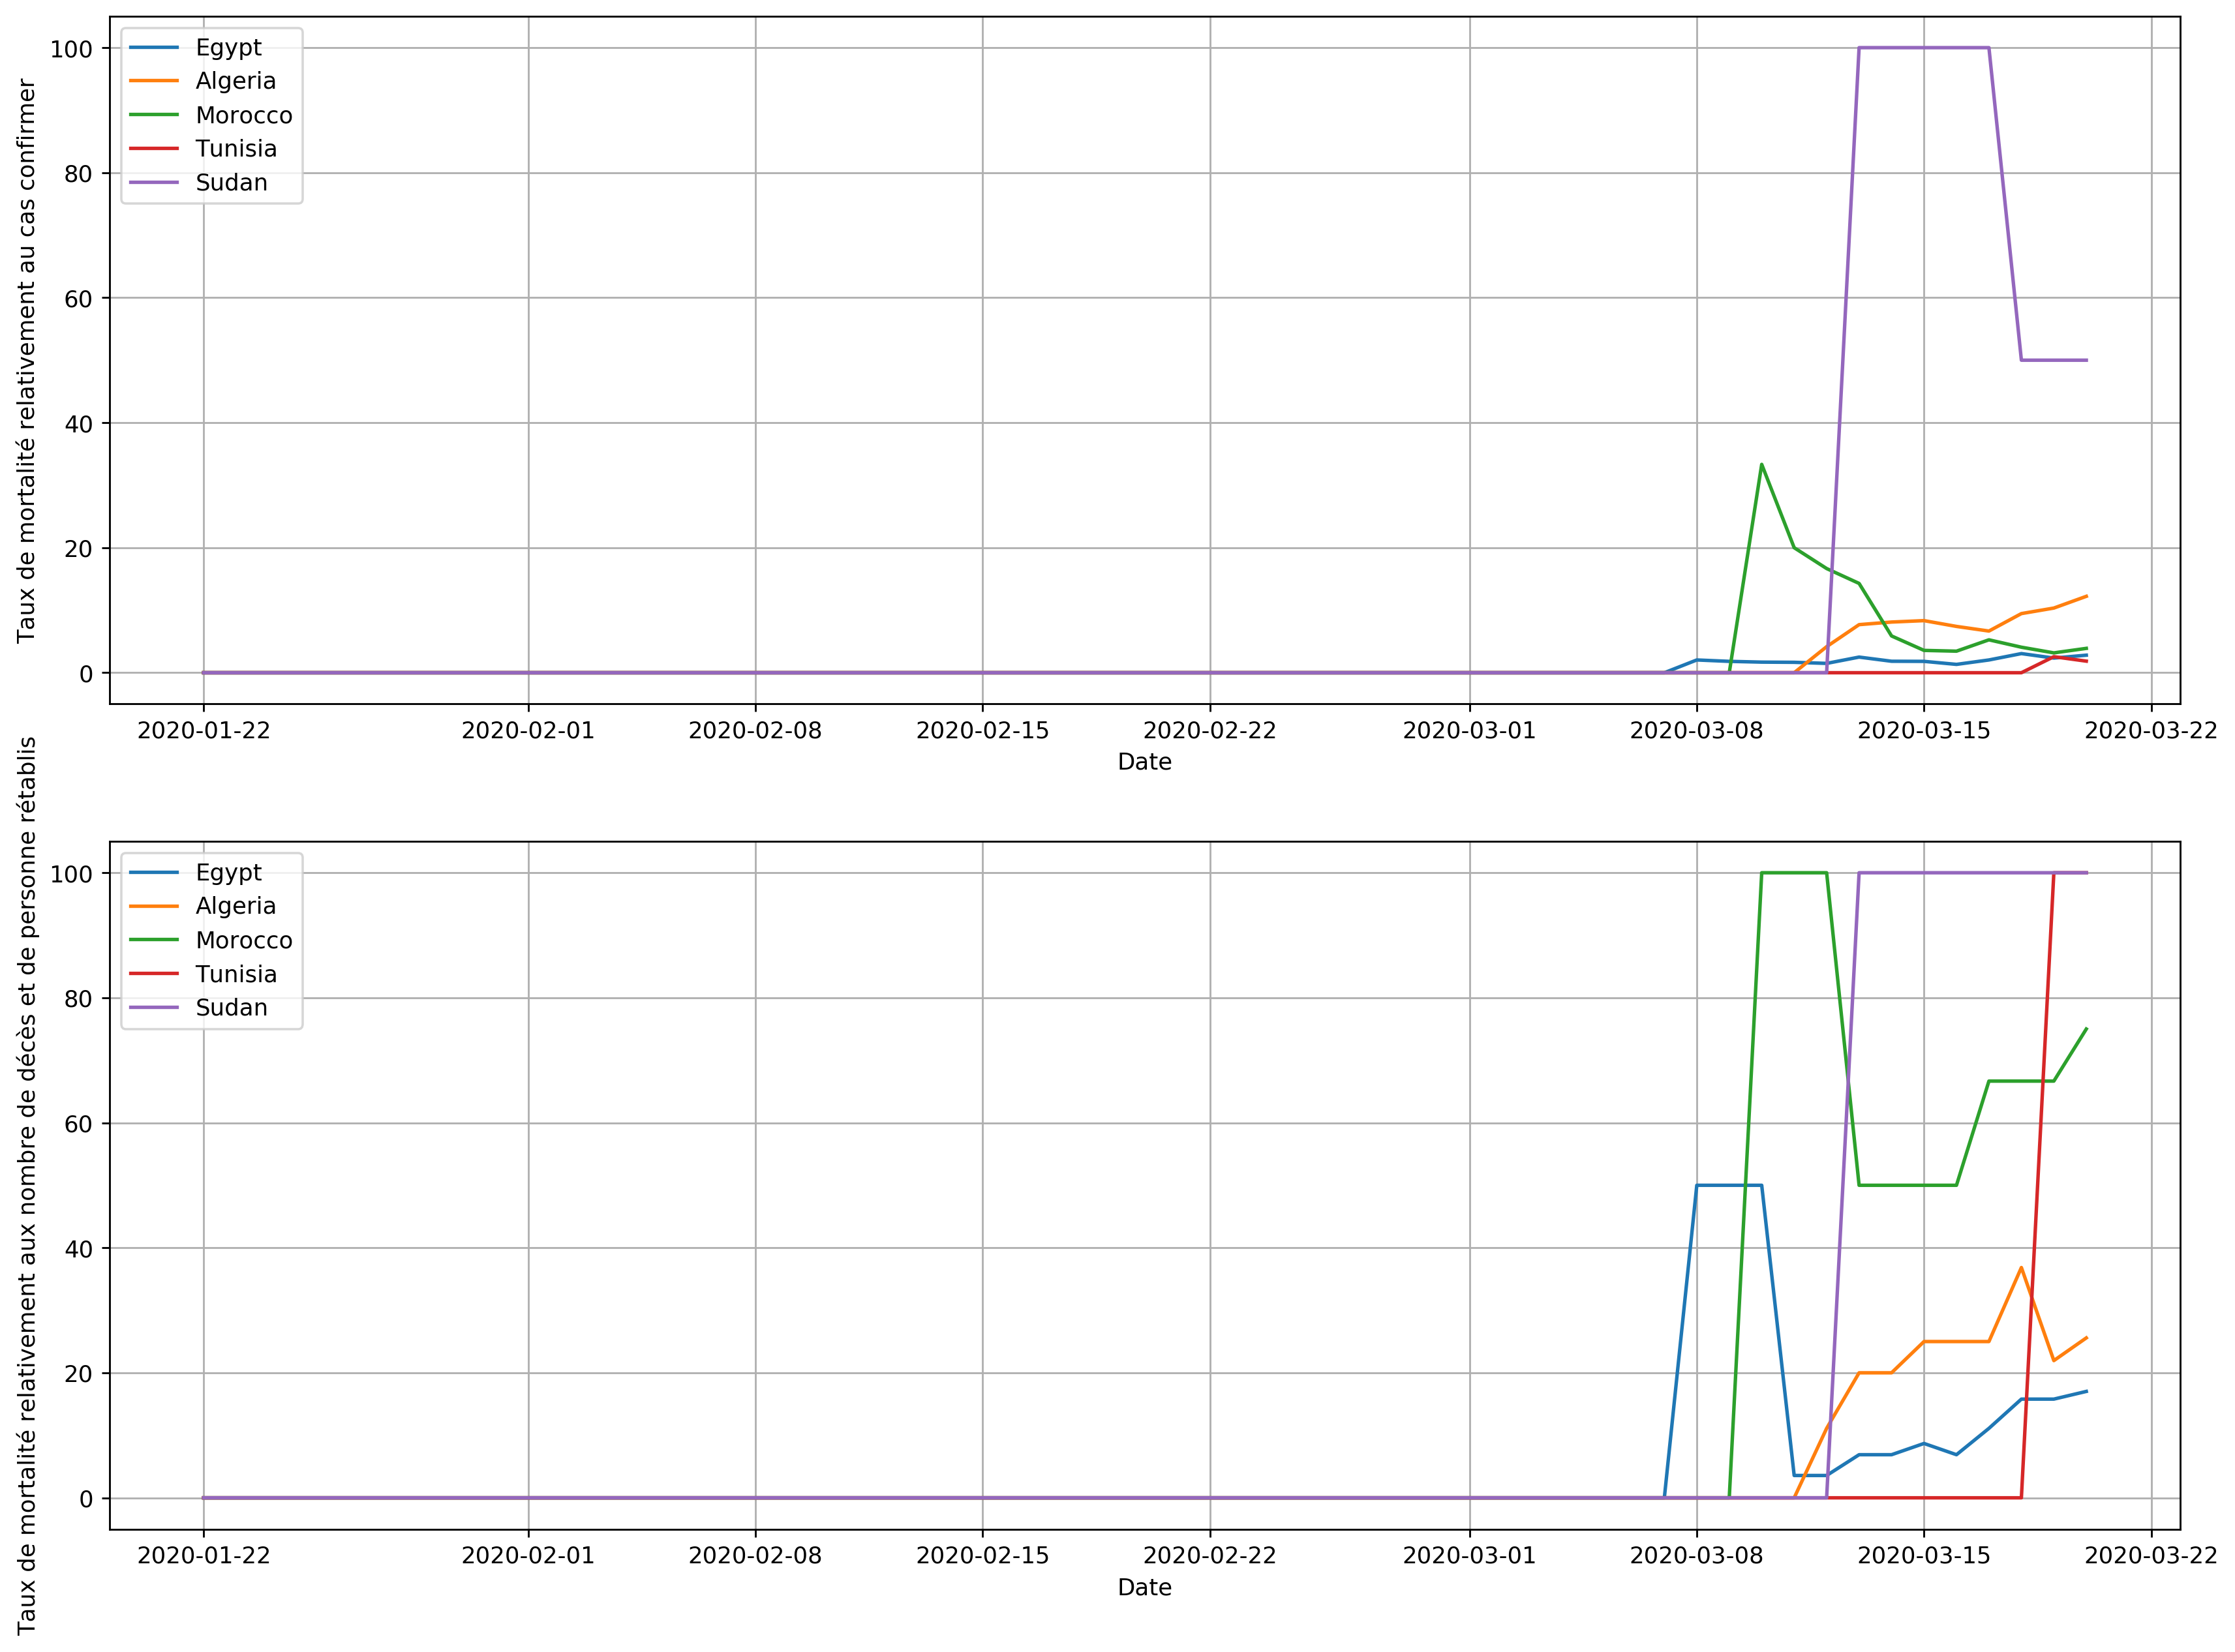

In [320]:
plt.figure(num=1, dpi=256, figsize=(16, 12))

plt.subplot(211)
for country in Covid19_NorthAf['Country/Region'].unique():
    data = Covid19_NorthAf.loc[Covid19_NorthAf['Country/Region'] == country, ['Date', 'ADR']].groupby(by='Date').mean()
    plt.plot(data.ADR, label=country)

plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Taux de mortalité relativement au cas confirmer')
plt.legend()

plt.subplot(212)
for country in Covid19_NorthAf['Country/Region'].unique():
    data = Covid19_NorthAf.loc[Covid19_NorthAf['Country/Region'] == country, ['Date', 'DRR']].groupby(by='Date').mean()
    plt.plot(data.DRR, label=country)

plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Taux de mortalité relativement aux nombre de décès et de personne rétablis')
plt.legend()

plt.show()